# 03wk-010: 아이스크림(초코/바닐라), 회귀분석

최규빈  
2023-09-21

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-yMATKoY2e3Ltd85lyvT-Ht&si=8Ke2fNuWswEvFReG>

# 2. Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

# 3. Data

`-` 전주시의 기온 불러오기

In [172]:
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()

In [173]:
temp # 전주시의 기온, 100개

`-` 아래와 같은 모형을 가정하자.

$$\textup{초코 아이스크림 판매량} = 20 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

$$\textup{바닐라 아이스크림 판매량} = 40 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

> 의미: (1) 온도가 1 올라가면 판매량이 2.5정도 오른다. (2) 동일
> 온도라면, 바닐라아이스크림은 초코아이스크림보다 20만큼 잘팔린다.

In [174]:
np.random.seed(43052)
choco = 20 + temp * 2.5 + np.random.randn(100)*3
vanilla = 40 + temp * 2.5 + np.random.randn(100)*3

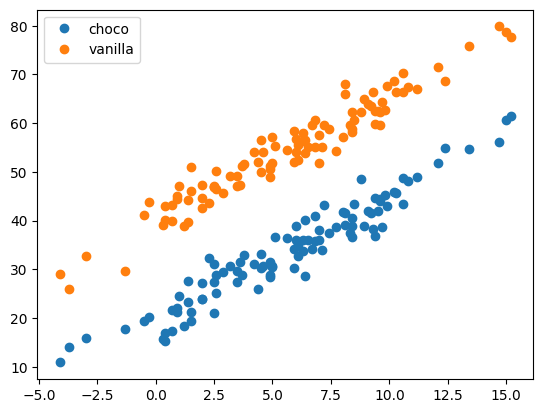

In [175]:
plt.plot(temp,choco,'o',label='choco')
plt.plot(temp,vanilla,'o',label='vanilla')
plt.legend()

`-` 주어진 자료: 우리는 아래를 관측했다고 생각하자.

In [176]:
df1 = pd.DataFrame({'temp':temp,'sales':choco}).assign(type='choco')
df2 = pd.DataFrame({'temp':temp,'sales':vanilla}).assign(type='vanilla')
df = pd.concat([df1,df2])
df

# 5. 분석

## A. 데이터

In [177]:
X = df[['temp','type']] # 독립변수, 설명변수, 피쳐
y = df[['sales']] # 종속변수, 반응변수, 타겟 

In [178]:
X = X.assign(type = [type == 'choco' for type in X.type])

## B. Predictor 생성

In [179]:
predictr = sklearn.linear_model.LinearRegression() 
predictr 

## C. 학습 (fit, learn)

In [180]:
predictr.fit(X,y)

## D. 예측 (predict)

In [181]:
yhat = predictr.predict(X)

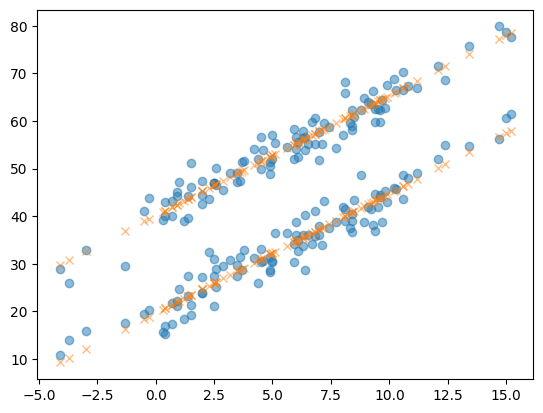

In [182]:
plt.plot(df.temp,df.sales,'o',alpha=0.5)
plt.plot(df.temp,yhat, 'x',alpha=0.5)

`-` 어떻게 맞춘거지?

$$\textup{아이스크림 판매량} = 40 + \textup{아이스크림종류} \times (-20) + \textup{온도} \times 2.5 + \textup{오차(운)}$$

In [183]:
predictr.coef_, predictr.intercept_

`-` 온도가 -2이고, type이 초코라면? 예측값은?

In [184]:
Xnew = pd.DataFrame({'temp':[-2.0],'type':[1]})
Xnew

In [185]:
predictr.predict(Xnew)

`-` 온도가 -2이고, type이 바닐라라면? 예측값은?

In [186]:
Xnew = pd.DataFrame({'temp':[-2.0],'type':[0]})
Xnew

In [187]:
predictr.predict(Xnew)

# 6. 데이터를 전처리하는 다른 방법

`-` 데이터

In [188]:
X = df[['temp','type']] # 독립변수, 설명변수, 피쳐
y = df[['sales']] # 종속변수, 반응변수, 타겟 

`-` 원-핫 인코딩

In [189]:
X = pd.get_dummies(X)
X

`-` 이후의 과정은 동일

In [190]:
predictr = sklearn.linear_model.LinearRegression() 
predictr.fit(X,y)
yhat2 = predictr.predict(X)

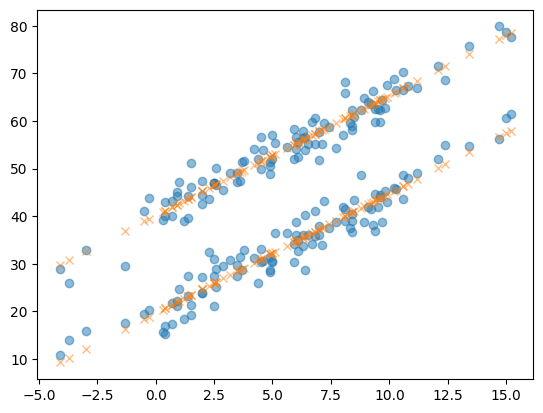

In [191]:
plt.plot(df.temp,df.sales,'o',alpha=0.5)
plt.plot(df.temp,yhat2, 'x',alpha=0.5)

`-` 모형을 어떻게 바라본걸까?

In [192]:
predictr.coef_

In [193]:
predictr.intercept_

$$\textup{아이스크림 판매량} = 30 + \textup{초코} \times (-10) + \textup{바닐라} \times 10 + \textup{온도} \times 2.5 + \textup{오차(운)}$$

# 7. 모형을 평가하는 방법

In [194]:
predictr.score(X,y)